<a href="https://colab.research.google.com/github/chandrakar-shubham/EDA-Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

This database includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

To understand the pattern of terrorist activities we need to the perform analysis in the following manner:

1. **Data Importing** : Importing the data into the dataframe.
2. **Understanding the problem** : We will explore and analysis the data to understand the pattern of terrorist attacks.
3. **Cleaning the data** : Removing duplicates, null/nan values.
4. **Feature engineering** : Removing,combining or creating features wherever neccessary.
5. **Identifying features** : Identifying numerical and categorical variable.
6. **Univariate analysis** : Analysing each feature individually, identifying distribution and trend in data.
7. **Multivariate analysis** : Analysing two or more features together and identifying relationship,trend etc.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imporing data .csv file

In [3]:
file_path ='/content/drive/MyDrive/Capstone projects/Global Terrorism Analysis/Global Terrorism Analysis/Global Terrorism Data.csv'

#creating dataframe from csv file

df =  pd.read_csv(file_path,encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
# settings to display all columns
pd.set_option("display.max_columns", None)

#Data checking

In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [7]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
# list of necessary columns

necessary_columns = ['iyear', 'imonth', 'iday','country', 'country_txt','region_txt','city',
                     'latitude', 'longitude', 'attacktype1_txt','targtype1_txt',
                     'targsubtype1_txt','target1','weaptype1_txt','nkill','nwound','success']

#Feature engineering

In [9]:
# keeping only necessary columns
df = df[necessary_columns]

In [10]:
df.head()

,iyear,imonth,iday,country,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,weaptype1_txt,nkill,nwound,success
0,1970,7,2,58,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1
1,1970,0,0,130,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1
2,1970,1,0,160,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1
3,1970,1,0,78,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,NaN,NaN,1
4,1970,1,0,101,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,NaN,NaN,1


In [11]:
# renaming columns

rename_dict ={'iyear' : 'year','imonth':'month','iday':'day','country_txt' : 'country_name','region_txt':'region_name','attacktype1_txt': 'attack_type','targtype1_txt': 'target_type', 'targsubtype1_txt':'targ_subtype','target1':'target_name','weaptype1_txt':'weapon_type'}


df = df.rename(columns=rename_dict)

In [12]:
df.head()

,year,month,day,country,country_name,region_name,city,latitude,longitude,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success
0,1970,7,2,58,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1
1,1970,0,0,130,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1
2,1970,1,0,160,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1
3,1970,1,0,78,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,NaN,NaN,1
4,1970,1,0,101,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,NaN,NaN,1


Handling duplicated rows

In [13]:



#check for duplicated rows

len(df[df.duplicated()])

10603

In [14]:
#removing duplicated rows

df=df[~df.duplicated()]

In [15]:
for col in df.columns:
  len_na = df[col].isna().sum()
  print(f'no of null value in {col} is = {round((len_na/len(df))*100,2)} percent null_value')

no of null value in year is = 0.0 percent null_value
no of null value in month is = 0.0 percent null_value
no of null value in day is = 0.0 percent null_value
no of null value in country is = 0.0 percent null_value
no of null value in country_name is = 0.0 percent null_value
no of null value in region_name is = 0.0 percent null_value
no of null value in city is = 0.25 percent null_value
no of null value in latitude is = 2.34 percent null_value
no of null value in longitude is = 2.34 percent null_value
no of null value in attack_type is = 0.0 percent null_value
no of null value in target_type is = 0.0 percent null_value
no of null value in targ_subtype is = 5.43 percent null_value
no of null value in target_name is = 0.32 percent null_value
no of null value in weapon_type is = 0.0 percent null_value
no of null value in nkill is = 5.47 percent null_value
no of null value in nwound is = 8.86 percent null_value
no of null value in success is = 0.0 percent null_value


In [16]:
#Dealing with the nan values 
df["city"].fillna("Unknown", inplace = True)
df["nkill"].fillna(0, inplace = True)
df["latitude"].fillna(0, inplace = True)
df["longitude"].fillna(0, inplace = True)
df["targ_subtype"].fillna("Unknown", inplace = True)
df["target_name"].fillna("Unknown", inplace = True)
df["nwound"].fillna(0, inplace = True)


In [17]:
#Checking the null value in the features
df.isnull().sum()

year            0
month           0
day             0
country         0
country_name    0
region_name     0
city            0
latitude        0
longitude       0
attack_type     0
target_type     0
targ_subtype    0
target_name     0
weapon_type     0
nkill           0
nwound          0
success         0
dtype: int64

In [18]:
def get_location(lat,long):
  '''get latitude and longitude return tuple of latitude and longitude'''
  return (lat,long)

In [19]:
# created new column containing total number of affected people

df['no_of_affected_people'] =df['nkill'] +df['nwound']


#create new column location using latitude and longitude

df['location']=df.apply(lambda x: get_location(x['latitude'],x['longitude']),axis =1)


In [20]:
df.head()

,year,month,day,country,country_name,region_name,city,latitude,longitude,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success,no_of_affected_people,location
0,1970,7,2,58,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1,1.0,"(18.456792, -69.951164)"
1,1970,0,0,130,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1,0.0,"(19.371887, -99.086624)"
2,1970,1,0,160,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1,1.0,"(15.478598, 120.599741)"
3,1970,1,0,78,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,0.0,0.0,1,0.0,"(37.99749, 23.762728)"
4,1970,1,0,101,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,0.0,0.0,1,0.0,"(33.580412, 130.396361)"


In [21]:
df.drop(columns=['latitude','longitude','country','month','day'],inplace = True)

In [22]:
df.head()

,year,country_name,region_name,city,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success,no_of_affected_people,location
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1,1.0,"(18.456792, -69.951164)"
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1,0.0,"(19.371887, -99.086624)"
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1,1.0,"(15.478598, 120.599741)"
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,0.0,0.0,1,0.0,"(37.99749, 23.762728)"
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,0.0,0.0,1,0.0,"(33.580412, 130.396361)"


#EDA on Global Terrorism Database

Checking for numerical and categorical variables

In [23]:
df.describe()

,year,nkill,nwound,success,no_of_affected_people
count,171088.000000,171088.000000,171088.000000,171088.000000,171088.000000
mean,2002.985715,2.377665,3.028336,0.889256,5.406002
std,13.202694,11.540740,35.339044,0.313816,41.757444
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,0.000000,0.000000,1.000000,0.000000
50%,2009.000000,0.000000,0.000000,1.000000,1.000000
75%,2014.000000,2.000000,2.000000,1.000000,4.000000
max,2017.000000,1570.000000,8191.000000,1.000000,9574.000000


#Univariate analysis

#Trend of terrorism globally over the span of 1970 to 2017

Key findings:
1. Distribution of attack per year is on overall increasing trend.

2. Trend no of attack happened in following years:
*   1st peak at year 1992 around 16000 attacks happened.
*   1st low at year 1988 around 1000 attacks.
*   2nd peak at year 2001 around 1800 attacks happend.
*   2nd low at year 2004 around 1000 attacks happend. 
*   3rd peak at year 2014 around 5000 attacks happend

3. After 2004 terrorism activity is rapidly rising 




Text(0.5, 1.0, 'Title: distribution of attack per year')

<Figure size 1728x864 with 0 Axes>

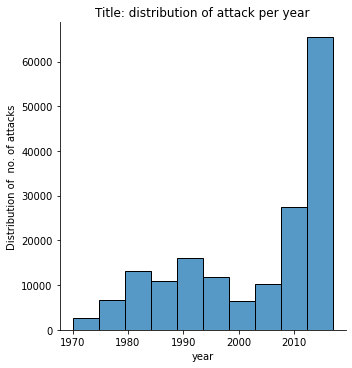

In [24]:
#Distribution of Global terrorism across years

plt.figure(figsize=(24,12))

sns.displot(data = df,x ="year",bins=10)
plt.ylabel("Distribution of  no. of attacks")
plt.title("Title: distribution of attack per year")

Text(0.5, 1.0, 'Title: No. of attack per year')

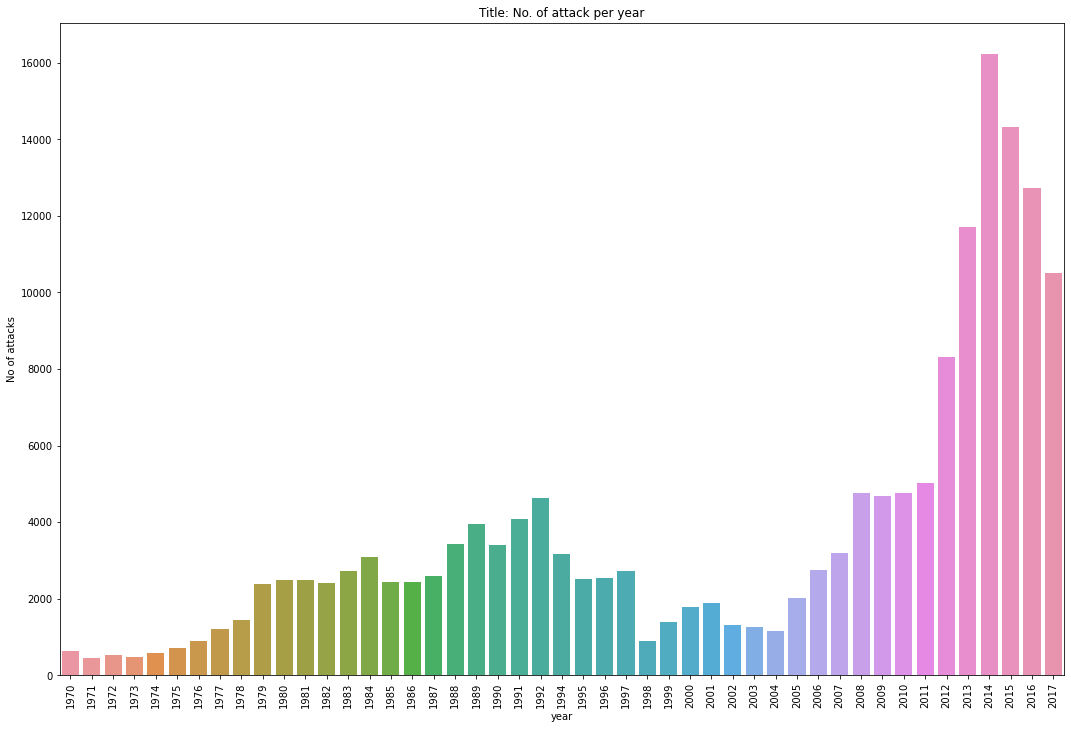

In [25]:
#visualising attack per year with countplot

plt.figure(figsize=(18,12))
sns.countplot(data = df,x ="year")
plt.xticks(rotation=90)
plt.ylabel("No of attacks")
plt.title("Title: No. of attack per year")

#Share of terrorist activity globally country wise from 1970 to 2017

In [26]:
import numpy as np

In [27]:
year_country_terrorism_df = pd.DataFrame(df.groupby(["country_name"]).size().reset_index().rename(columns = {0:'no_of_terrorist_activity'}).sort_values(by='no_of_terrorist_activity',ascending = False))

In [28]:
year_country_terrorism_df

,country_name,no_of_terrorist_activity
84,Iraq,23105
134,Pakistan,13721
0,Afghanistan,12473
80,India,11540
35,Colombia,7495
...,...,...
3,Andorra,1
5,Antigua and Barbuda,1
82,International,1
169,St. Lucia,1


In [29]:
year_country_terrorism_df['no_of_terrorist_activity'].describe([0.2,0.75,0.80,0.95,0.99])

count      205.000000
mean       834.575610
std       2439.727721
min          1.000000
20%          8.000000
50%         63.000000
75%        346.000000
80%        671.400000
95%       4011.400000
99%      12435.680000
max      23105.000000
Name: no_of_terrorist_activity, dtype: float64

In [30]:
top_year_country_terrorism_df = year_country_terrorism_df[year_country_terrorism_df['no_of_terrorist_activity'].values >= 4000]
bottom_year_country_terrorism_df = year_country_terrorism_df[year_country_terrorism_df['no_of_terrorist_activity'].values < 4000]


In [31]:
total_sum_others = bottom_year_country_terrorism_df['no_of_terrorist_activity'].sum()
data = [['others',total_sum_others]]
other_df = pd.DataFrame(data,columns = ['country_name','no_of_terrorist_activity'])

In [32]:
year_country_terrorism_df = pd.concat([top_year_country_terrorism_df,other_df])

In [33]:
year_country_terrorism_df

,country_name,no_of_terrorist_activity
84,Iraq,23105
134,Pakistan,13721
0,Afghanistan,12473
80,India,11540
35,Colombia,7495
140,Philippines,6766
139,Peru,5052
188,United Kingdom,4988
52,El Salvador,4303
159,Somalia,4087


In [34]:
# list of most affected country

most_affected_country = year_country_terrorism_df.country_name.to_list()

Key findings about ***share of terrorist activity globally country wise from 1970 to 2017***

1. *Iraq is most affected country* with 14% overall share of  terrorist activity globally.

2. *Second most affected country is Pakistan* with 8% overall share of  terrorist activity globally.

3. T*hird most affected is Afganistan* with 7% overall share of  terrorist activity globally.

4. *Fourth most affected is India* with 7% overall share of  terrorist activity globally.


5. 11 countries inclunding above four countries share 57 % percent of terrorist activity globally and rest of 194 countries share 43 % percent of terrorist activity globally.

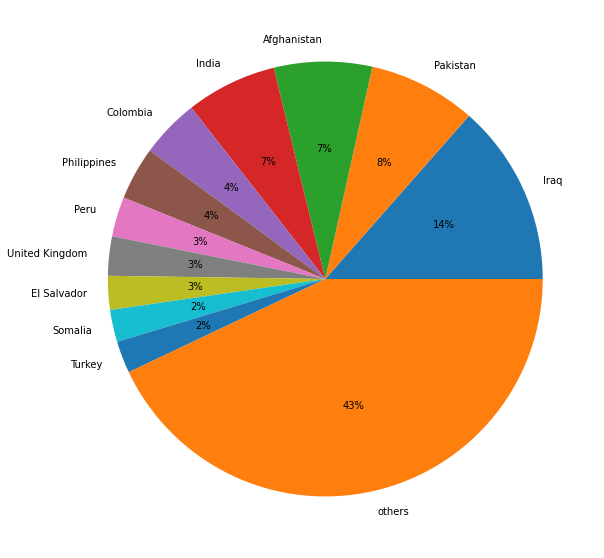

In [35]:
#colors = sns.color_palette('bright')[:40]
fig = plt.figure(figsize =(15, 10))
plt.pie(list(year_country_terrorism_df['no_of_terrorist_activity'].values),labels = list(year_country_terrorism_df['country_name'].values),autopct='%1.0f%%')
plt.show()

In [36]:
df.head()

,year,country_name,region_name,city,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success,no_of_affected_people,location
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1,1.0,"(18.456792, -69.951164)"
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1,0.0,"(19.371887, -99.086624)"
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1,1.0,"(15.478598, 120.599741)"
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,0.0,0.0,1,0.0,"(37.99749, 23.762728)"
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,0.0,0.0,1,0.0,"(33.580412, 130.396361)"


# Most targeted city from 1970 to 2017

Key findings:
1. 75% of cities had less than 2 terror acitvities
2. 90% of cities had less than 5 terror acitvities
3. Baghdad is most targeted city having 7428 terrorist activity followed by Karachi and Mosul.

In [37]:
targeted_city = pd.DataFrame(df.groupby("city").size().sort_values(ascending = False).reset_index().rename(columns = {0:'count'}))
targeted_city

,city,count
0,Unknown,8547
1,Baghdad,7428
2,Karachi,2175
3,Mosul,2053
4,Belfast,2014
...,...,...
36669,Jaiyus,1
36670,Jaito,1
36671,Jaishidhi,1
36672,Jairampur,1


In [38]:
# total no of cities in the dataframe
len(targeted_city)

36674

In [39]:
targeted_city.describe([0.75,0.90,0.99,0.999])

,count
count,36674.000000
mean,4.665103
std,67.605623
min,1.000000
50%,1.000000
75%,2.000000
90%,5.000000
99%,46.000000
99.9%,401.905000
max,8547.000000


In [40]:
targeted_city.head()

,city,count
0,Unknown,8547
1,Baghdad,7428
2,Karachi,2175
3,Mosul,2053
4,Belfast,2014


In [41]:
five_labels = ['Very_Low','Low','Average','High','Very_high']

In [42]:
targeted_city['Severity_terrorism'] = pd.cut(targeted_city['count'],  bins=5,labels = five_labels,right=False)

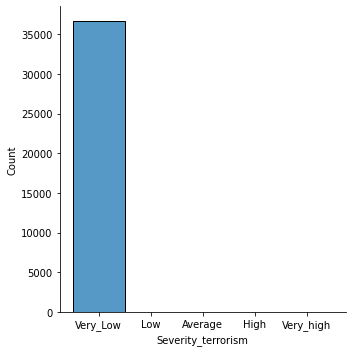

In [43]:
sns.displot(data = targeted_city,x='Severity_terrorism')

In [44]:
top_20_targeted_city = targeted_city[1:21]
top_20_targeted_city

,city,count,Severity_terrorism
1,Baghdad,7428,Very_high
2,Karachi,2175,Low
3,Mosul,2053,Low
4,Belfast,2014,Low
5,Lima,1742,Low
6,Mogadishu,1548,Very_Low
7,Santiago,1347,Very_Low
8,San Salvador,1242,Very_Low
9,Istanbul,913,Very_Low
10,Kirkuk,912,Very_Low


Text(0, 0.5, 'Title : Total no of terrorist activity in the city')

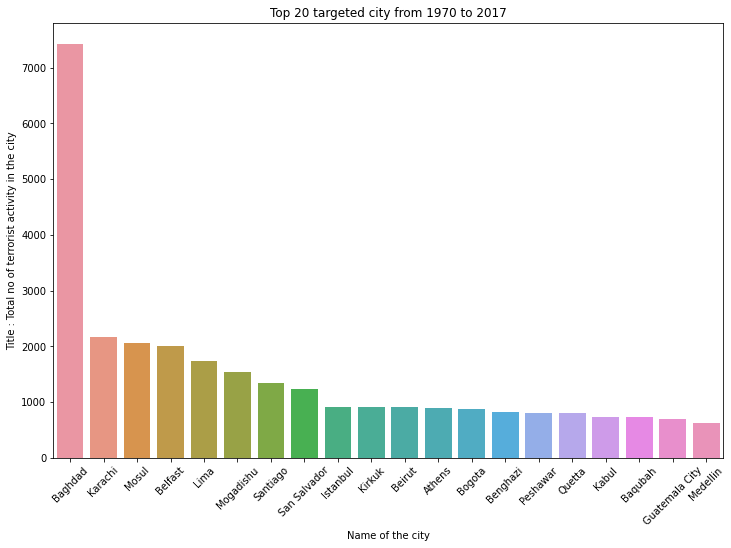

In [45]:
#visualize top ten targeted city
fig = plt.figure(figsize =(12, 8))
sns.barplot(data = top_20_targeted_city,x='city',y='count')
plt.title("Top 20 targeted city from 1970 to 2017")
plt.xticks(rotation=45)
plt.xlabel('Name of the city')
plt.ylabel('Title : Total no of terrorist activity in the city')


# Mode of Attack by used by terrorism

Key findings related to mode of attack are as follows:
1. **Bombing/Explosion** constitutes 48% of globally used mode of attack preferred by terrorist.

2. **Armed assualt** is second most preferred mode of attack, constitutes 24% of globally used mode of attack preferred by terrorist.

3. **Assasination** is third most preferred mode of attack, constitutes 11% of globally used mode of attack preferred by terrorist.

In [46]:
df.head()

,year,country_name,region_name,city,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success,no_of_affected_people,location
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1,1.0,"(18.456792, -69.951164)"
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1,0.0,"(19.371887, -99.086624)"
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1,1.0,"(15.478598, 120.599741)"
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,0.0,0.0,1,0.0,"(37.99749, 23.762728)"
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,0.0,0.0,1,0.0,"(33.580412, 130.396361)"


In [47]:
attack_pattern_df = pd.DataFrame(df['attack_type'].value_counts().reset_index().rename(columns= {'index':'type_of_attack','attack_type':'no_of_attack'}))

In [48]:
attack_pattern_df

,type_of_attack,no_of_attack
0,Bombing/Explosion,81356
1,Armed Assault,41246
2,Assassination,18885
3,Hostage Taking (Kidnapping),10952
4,Facility/Infrastructure Attack,9233
5,Unknown,6898
6,Hostage Taking (Barricade Incident),938
7,Unarmed Assault,930
8,Hijacking,650


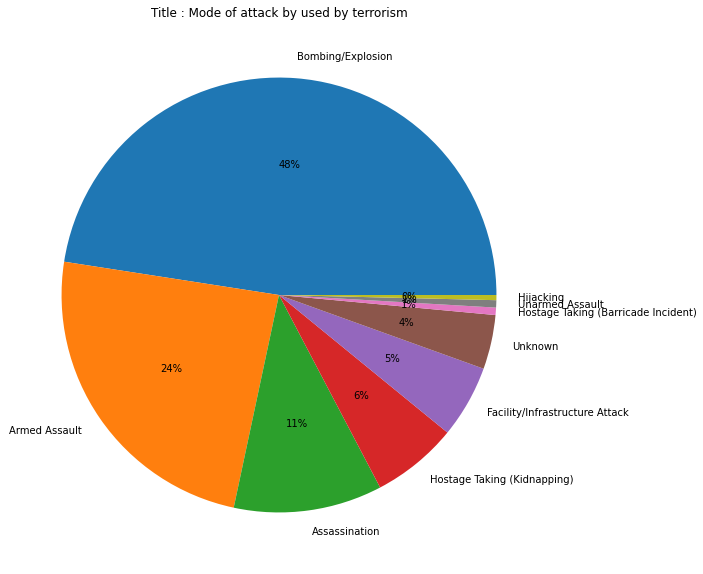

In [49]:
# Visualize mode of attack by used by terrorism

fig = plt.figure(figsize =(15, 10))
plt.pie(attack_pattern_df['no_of_attack'],labels = attack_pattern_df['type_of_attack'],autopct='%1.0f%%')
plt.title('Title : Mode of attack by used by terrorism')
plt.show()



# Type of institutinal targets targeted by terrorist over span of 1970 to 2017

Key finding related institutinal targets targeted by terrorist over span of 1970 to 2017:

1.  Most targeted institutinal target is Private Citizens & Property, it consitutes 17% of all institutional target targeted by terrorist.

2. Second most targeted institutinal target is Military,it constitutes 11% of all institutional target targeted by terrorist.

3. Third most targeted institutinal target is Police,it constitutes 10% of all institutional target targeted by terrorist.

4. Fourth most targeted institutinal target is Government (General),it constitutes 9% of all institutional target targeted by terrorist.

5. Fifth most targeted institutinal target is Business,it constitutes 8% of all institutional target targeted by terrorist.

In [50]:
institutional_target_df = pd.DataFrame(df['target_type'].value_counts().reset_index().rename(columns= {'index':'type_of_target','target_type':'no_of_target'}))
institutional_target_df

,type_of_target,no_of_target
0,Private Citizens & Property,41037
1,Military,27447
2,Police,23756
3,Government (General),20447
4,Business,18861
5,Transportation,6095
6,Unknown,5065
7,Religious Figures/Institutions,4267
8,Educational Institution,4143
9,Utilities,4139


In [51]:
top_target_df = institutional_target_df[:14]
top_target_df

,type_of_target,no_of_target
0,Private Citizens & Property,41037
1,Military,27447
2,Police,23756
3,Government (General),20447
4,Business,18861
5,Transportation,6095
6,Unknown,5065
7,Religious Figures/Institutions,4267
8,Educational Institution,4143
9,Utilities,4139


In [52]:
bottom_target_df = institutional_target_df[14:]
bottom_target_df

,type_of_target,no_of_target
14,Airports & Aircraft,1320
15,NGO,956
16,Telecommunication,908
17,Tourists,431
18,Maritime,339
19,Food or Water Supply,297
20,Abortion Related,257
21,Other,132


In [53]:
total_sum_other_target = bottom_target_df['no_of_target'].sum()
data_other_target = [['others',total_sum_other_target]]
other_target_df = pd.DataFrame(data,columns = ['type_of_target','no_of_target'])

institutional_target_df = pd.concat([top_target_df,other_target_df])

In [54]:
# List of targets of terrorist
institutional_target_df

,type_of_target,no_of_target
0,Private Citizens & Property,41037
1,Military,27447
2,Police,23756
3,Government (General),20447
4,Business,18861
5,Transportation,6095
6,Unknown,5065
7,Religious Figures/Institutions,4267
8,Educational Institution,4143
9,Utilities,4139


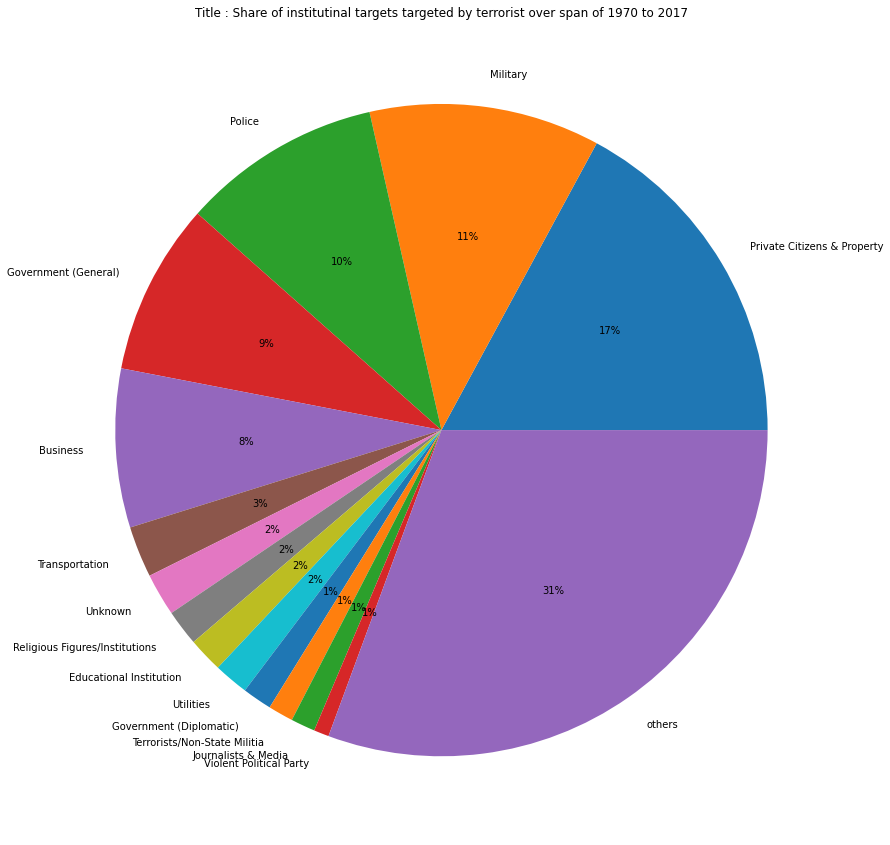

In [55]:
# Visualize mode of attack by used by terrorism

fig = plt.figure(figsize =(35, 15))
plt.pie(institutional_target_df['no_of_target'],labels = institutional_target_df['type_of_target'],autopct='%1.0f%%')
plt.title('Title : Share of institutinal targets targeted by terrorist over span of 1970 to 2017')
plt.show()

# Subtargets targeted by terrorists

Key finding related sub-targets targeted by terrorist over span of 1970 to 2017:

1.  Most targeted sub-targets is Civilians, it consitutes 11143 attacks of all sub-target targeted by terrorist.

2. Second most targeted sub-targets is Police Security Forces/Officers,it consitutes 10820 attacks of all sub-target targeted by terrorist..

3. Third most targeted sub-targets is Unknown,it consitutes 9285 attacks of all sub-target targeted by terrorist.

4. Fourth most targeted sub-targets is Military Unit/Patrol/Convoy,it consitutes 9285 attacks of all sub-target targeted by terrorist.

5. Fifth most targeted sub-targets is Military Personnel (soldiers, troops, officers, forces),it constitutes 7787 of all all sub-target targeted by terrorist.

In [56]:
df.head()

,year,country_name,region_name,city,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success,no_of_affected_people,location
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1,1.0,"(18.456792, -69.951164)"
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1,0.0,"(19.371887, -99.086624)"
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1,1.0,"(15.478598, 120.599741)"
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,0.0,0.0,1,0.0,"(37.99749, 23.762728)"
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,0.0,0.0,1,0.0,"(33.580412, 130.396361)"


In [57]:
# Creation of dataframe with group of type of subtarget and its no of times it was targeted

sub_target_df = pd.DataFrame(df['targ_subtype'].value_counts().reset_index().rename(columns= {'index':'type_of_sub_target','target_type':'no_of_target'}))
sub_target_df

,type_of_sub_target,targ_subtype
0,Unnamed Civilian/Unspecified,11143
1,Police Security Forces/Officers,10820
2,Unknown,9285
3,Military Unit/Patrol/Convoy,8193
4,"Military Personnel (soldiers, troops, officers...",7787
...,...,...
108,Multiple Telecommunication Targets,30
109,Fire Fighter/Truck,25
110,Oil Tanker,19
111,Personnel,19


In [58]:
# This dataframe consist of top 20 subtarget

top_sub_target_df = sub_target_df[:20]
top_sub_target_df

,type_of_sub_target,targ_subtype
0,Unnamed Civilian/Unspecified,11143
1,Police Security Forces/Officers,10820
2,Unknown,9285
3,Military Unit/Patrol/Convoy,8193
4,"Military Personnel (soldiers, troops, officers...",7787
5,"Government Personnel (excluding police, military)",6565
6,Village/City/Town/Suburb,6063
7,Politician or Political Party Movement/Meeting...,6055
8,"Police Building (headquarters, station, school)",5640
9,Police Patrol (including vehicles and convoys),5079


Text(0.5, 1.0, 'Title: Sub-target targeted by terrorist in span of 1970 to 2017')

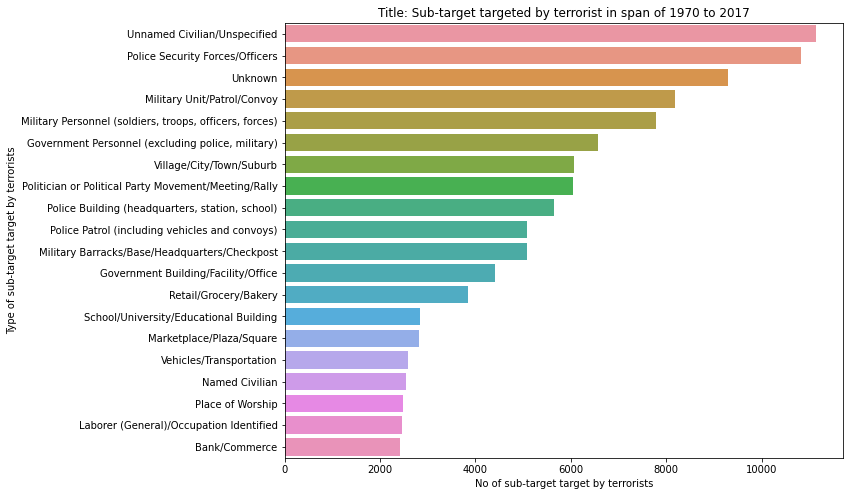

In [59]:
# visualization top 20 subtarget targeted by terrorist in span of 1970 to 2017 using bar plot

fig = plt.figure(figsize =(10, 8))
sns.barplot(data = top_sub_target_df, y='type_of_sub_target',x='targ_subtype')
plt.xticks(rotation=0)
plt.ylabel("Type of sub-target target by terrorists")
plt.xlabel("No of sub-target target by terrorists")
plt.title("Title: Sub-target targeted by terrorist in span of 1970 to 2017")

#Name of Top 20 target of terrorist

Name of top 20 individual target of terrorists are
 Civilians,
 Unknown,
 Soldiers,
 Patrol,
 Checkpoint,
 Vehicle,
 Officers,
 Village,
 Military Unit,
 Convoy,
 Unit,
 Market,
 Police Station,
 Bus,
 Base,
 Office,
 Checkpost,
 Post,
 Headquarters,
 Mosque.



In [60]:
df.head()

,year,country_name,region_name,city,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success,no_of_affected_people,location
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1,1.0,"(18.456792, -69.951164)"
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1,0.0,"(19.371887, -99.086624)"
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1,1.0,"(15.478598, 120.599741)"
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,0.0,0.0,1,0.0,"(37.99749, 23.762728)"
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,0.0,0.0,1,0.0,"(33.580412, 130.396361)"


In [61]:
df['target_name'].value_counts()

Civilians                  6234
Unknown                    5878
Soldiers                   3048
Patrol                     2925
Checkpoint                 2760
                           ... 
Mayor Sanit Lokasemsant       1
John Dignam                   1
Aidan Starrs                  1
Gregory Burns                 1
Hmeymim Air Base              1
Name: target_name, Length: 86006, dtype: int64

In [62]:
# Creation of dataframe with group of type of subtarget and its no of times it was targeted

name_of_target_df = pd.DataFrame(df['target_name'].value_counts().reset_index().rename(columns= {'index':'name_of_target','target_name':'no_of_times_targeted'}))


In [63]:
name_of_target_df

,name_of_target,no_of_times_targeted
0,Civilians,6234
1,Unknown,5878
2,Soldiers,3048
3,Patrol,2925
4,Checkpoint,2760
...,...,...
86001,Mayor Sanit Lokasemsant,1
86002,John Dignam,1
86003,Aidan Starrs,1
86004,Gregory Burns,1


In [64]:
#top 20 name of target targeted by terrorist

top20_name_of_target_df=name_of_target_df[:20]

In [65]:
top20_name_of_target_df['name_of_target'].tolist()

['Civilians',
 'Unknown',
 'Soldiers',
 'Patrol',
 'Checkpoint',
 'Vehicle',
 'Officers',
 'Village',
 'Military Unit',
 'Convoy',
 'Unit',
 'Market',
 'Police Station',
 'Bus',
 'Base',
 'Office',
 'Checkpost',
 'Post',
 'Headquarters',
 'Mosque']

Text(0.5, 1.0, 'Title: Name of target targeted by terrorist in span of 1970 to 2017')

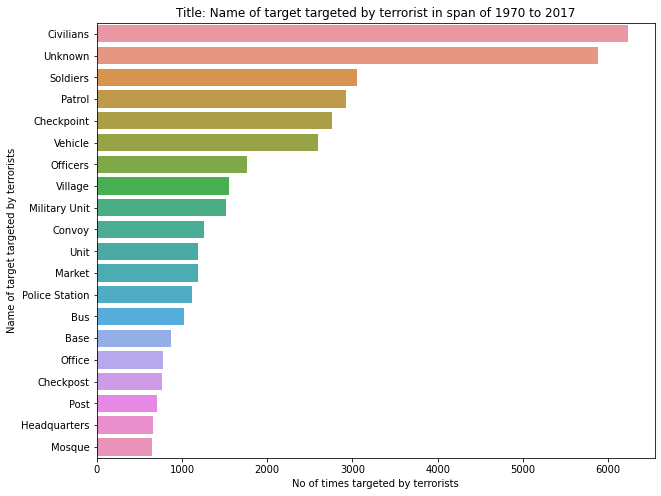

In [67]:
# visualization Name of top 20 target targeted by terrorist in span of 1970 to 2017 using bar plot

fig = plt.figure(figsize =(10, 8))
sns.barplot(data = top20_name_of_target_df, y='name_of_target',x='no_of_times_targeted')
plt.xticks(rotation=0)
plt.ylabel("Name of target targeted by terrorists")
plt.xlabel("No of times targeted by terrorists")
plt.title("Title: Name of target targeted by terrorist in span of 1970 to 2017")

#Type of weapon used by terrorist

Key findings related to type of weapon used by terrorist in terrorist attacks:
1. Most preferred type of weapon is Explosives.
2. Second Most preferred type of weapon is Firearms.
3. Third Most preferred type of weapon is Incendiary.


Other types of weapon used are: Melee, Chemical, Sabotage Equipment, Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs), Biological, Fake Weapons,Radiological.



In [68]:
df.head()

,year,country_name,region_name,city,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success,no_of_affected_people,location
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1,1.0,"(18.456792, -69.951164)"
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1,0.0,"(19.371887, -99.086624)"
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1,1.0,"(15.478598, 120.599741)"
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,0.0,0.0,1,0.0,"(37.99749, 23.762728)"
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,0.0,0.0,1,0.0,"(33.580412, 130.396361)"


In [69]:
df['weapon_type'].value_counts()

Explosives                                                                     85547
Firearms                                                                       57303
Unknown                                                                        14456
Incendiary                                                                      9472
Melee                                                                           3530
Chemical                                                                         314
Sabotage Equipment                                                               136
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            112
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [71]:
# Creation of dataframe with type of weapon and its no of times it was used

weapon_df = pd.DataFrame(df['weapon_type'].value_counts().reset_index().rename(columns= {'index':'type_of_weapon','weapon_type':'no_of_times_weapon_used'}))
weapon_df


,type_of_weapon,no_of_times_weapon_used
0,Explosives,85547
1,Firearms,57303
2,Unknown,14456
3,Incendiary,9472
4,Melee,3530
5,Chemical,314
6,Sabotage Equipment,136
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,112
9,Biological,35


In [72]:
weapon_df.type_of_weapon.to_list()

['Explosives',
 'Firearms',
 'Unknown',
 'Incendiary',
 'Melee',
 'Chemical',
 'Sabotage Equipment',
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
 'Other',
 'Biological',
 'Fake Weapons',
 'Radiological']

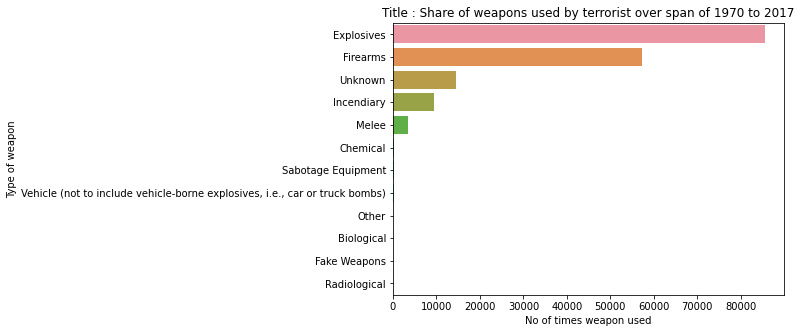

In [73]:
# Visualize type of weapon by used by terrorist

fig = plt.figure(figsize =(7, 5))
sns.barplot(data = weapon_df,x=weapon_df['no_of_times_weapon_used'],y = weapon_df['type_of_weapon'])
plt.title('Title : Share of weapons used by terrorist over span of 1970 to 2017')
plt.xlabel('No of times weapon used')
plt.ylabel('Type of weapon')
plt.show()

#Successful terrorist attacks  

Trend indicates that in any year were mostly successful.

In [74]:
df.head()

,year,country_name,region_name,city,attack_type,target_type,targ_subtype,target_name,weapon_type,nkill,nwound,success,no_of_affected_people,location
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,1,1.0,"(18.456792, -69.951164)"
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,1,0.0,"(19.371887, -99.086624)"
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,1,1.0,"(15.478598, 120.599741)"
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,0.0,0.0,1,0.0,"(37.99749, 23.762728)"
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,0.0,0.0,1,0.0,"(33.580412, 130.396361)"


Text(0.5, 1.0, 'Title: No. of attack per year')

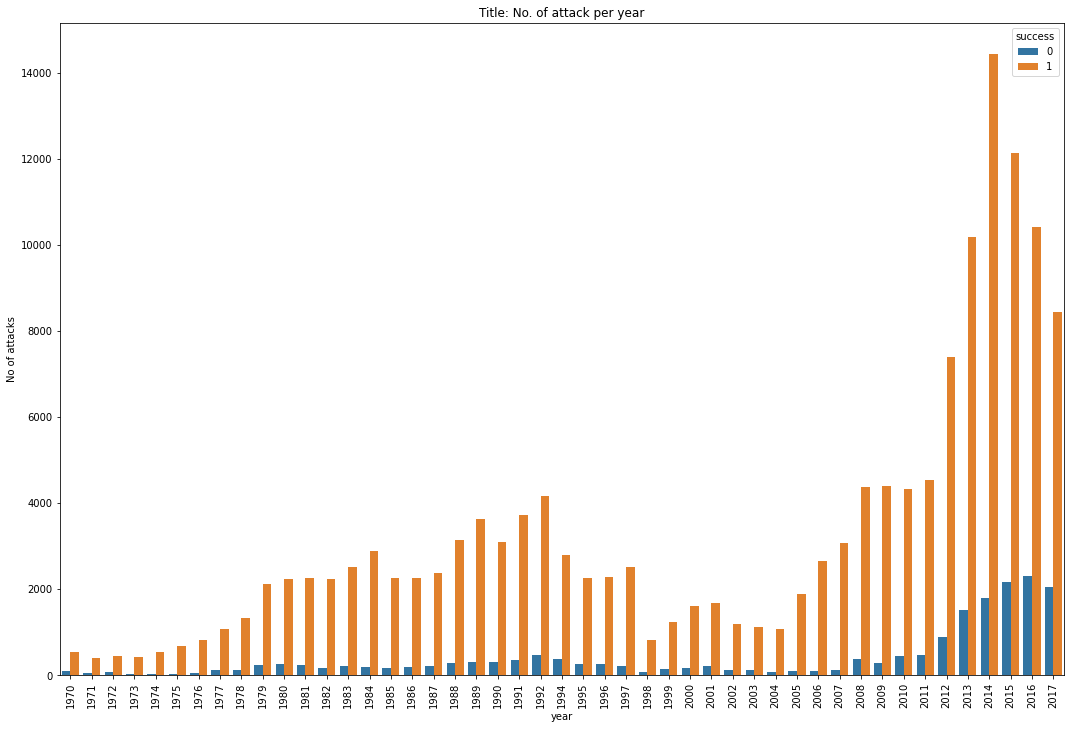

In [75]:
#visualising successful attack each year with countplot

plt.figure(figsize=(18,12))
sns.countplot(data = df,x ="year",hue = "success")
plt.xticks(rotation=90)
plt.ylabel("No of attacks")
plt.title("Title: No. of attack per year")

#No of identified kills each year

Key findings related to no of kills:
1. No of kills are mostly around 10000 kills in any year as per distribution plot.

2. We found that after 2012 no of kills globally increased drastically and average no of kills between 2012 to 2017 is = 30,000.

3. Average no of kills before 2012 is = 5,531.
4. Avg no of kills between 2012 to 2017 is = 29998

So there is almost five times increase in no kills over the span of 1970 to 2017

In [76]:
df.groupby('year')['nkill'].sum()

year
1970      174.0
1971      173.0
1972      565.0
1973      370.0
1974      539.0
1975      616.0
1976      674.0
1977      456.0
1978     1456.0
1979     2079.0
1980     4390.0
1981     4846.0
1982     5136.0
1983     9433.0
1984    10337.0
1985     6985.0
1986     4931.0
1987     6115.0
1988     7197.0
1989     8114.0
1990     6988.0
1991     8390.0
1992     9631.0
1994     7615.0
1995     5862.0
1996     6827.0
1997    10116.0
1998     4656.0
1999     3392.0
2000     4403.0
2001     7720.0
2002     4701.0
2003     3313.0
2004     5741.0
2005     6317.0
2006     9362.0
2007    12774.0
2008     9146.0
2009     9273.0
2010     7806.0
2011     8181.0
2012    15310.0
2013    22087.0
2014    44179.0
2015    38029.0
2016    34212.0
2017    26173.0
Name: nkill, dtype: float64

In [77]:
year_kills = pd.DataFrame(df.groupby('year')['nkill'].sum().reset_index().rename(columns = {'nkill':'no_of_kills'}))

In [78]:
year_kills

,year,no_of_kills
0,1970,174.0
1,1971,173.0
2,1972,565.0
3,1973,370.0
4,1974,539.0
5,1975,616.0
6,1976,674.0
7,1977,456.0
8,1978,1456.0
9,1979,2079.0


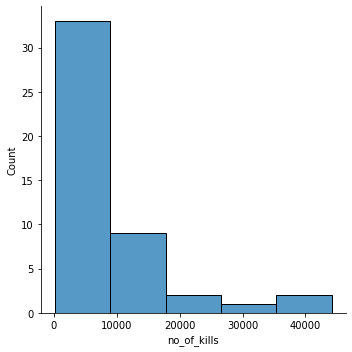

In [79]:
#distribution of no of kills from 1970 to 2017

sns.displot(data= year_kills,x ='no_of_kills',bins =5)

Text(0.5, 1.0, 'Title: No. of kills each year in span of 1970 to 2017')

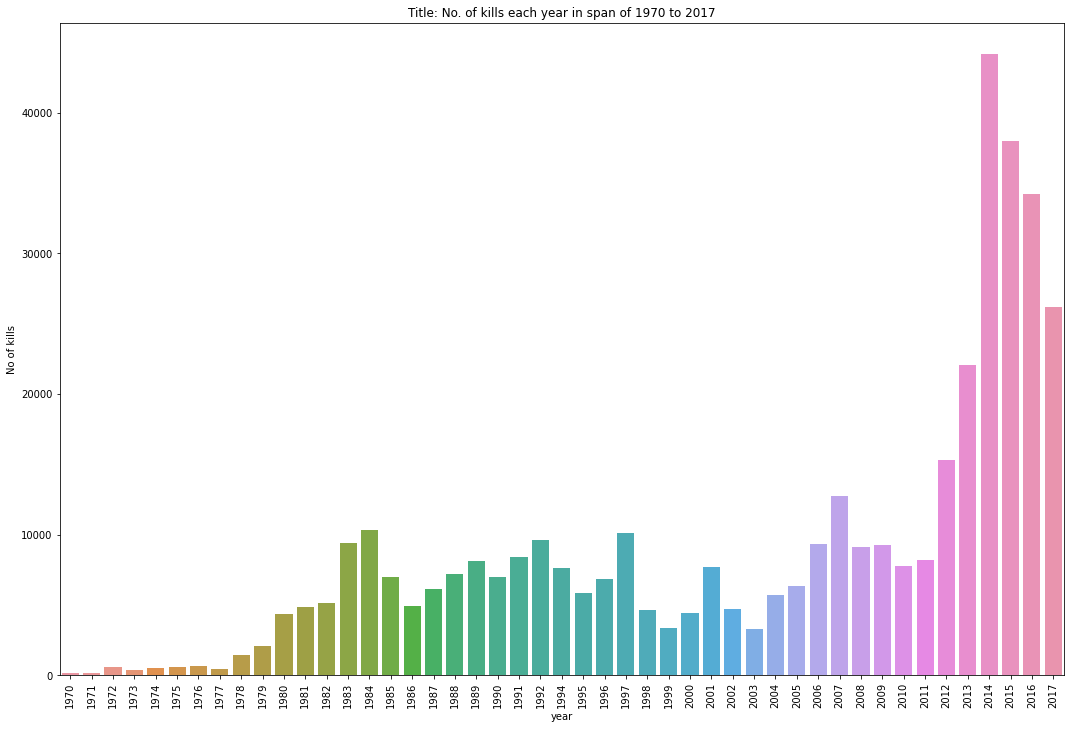

In [80]:
#visualising no of kills each year with barplot

plt.figure(figsize=(18,12))
sns.barplot(data = year_kills,x ="year",y='no_of_kills')
plt.xticks(rotation=90)
plt.ylabel("No of kills")
plt.title("Title: No. of kills each year in span of 1970 to 2017")

In [81]:
#Average no of kills between 2012 and 2017
avg_no_kills_2012_to_17 = year_kills[year_kills['year']>=2012].no_of_kills.sum()/len(year_kills[year_kills['year']>=2012])
print(f'avg no of kills between 2012 to 2017 is = {avg_no_kills_2012_to_17}')

avg no of kills between 2012 to 2017 is = 29998.333333333332


In [82]:
#Average no of kills before 2012
avg_no_kills_before_2012 = year_kills[year_kills['year']<2012].no_of_kills.sum()/len(year_kills[year_kills['year']<2012])
print(f'avg no of kills before 2012 is = {avg_no_kills_before_2012}')

avg no of kills before 2012 is = 5531.707317073171


#No of identified wounded peoples

Key findings related to identified wounded peoples:
1. There is rising trend in no of idenfied wounded people, similar to no of identified over the years
2. Most of the times no of wounded are less than 10000 over the span of 1970 to 2017
3. Three times no of wonded people peaked are as follows:
Year 1995 = 14227
Year 2001 = 22762
Year 2015 = 42971
4. Avg no of wounded people between 1970 to 2000 is = 4748
   Avg no of wounded people between 2000 to 2017 is = 15548

So similar to no of identified kills there is drastically increase in no of wounded people after Year 2000.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171088 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   171088 non-null  int64  
 1   country_name           171088 non-null  object 
 2   region_name            171088 non-null  object 
 3   city                   171088 non-null  object 
 4   attack_type            171088 non-null  object 
 5   target_type            171088 non-null  object 
 6   targ_subtype           171088 non-null  object 
 7   target_name            171088 non-null  object 
 8   weapon_type            171088 non-null  object 
 9   nkill                  171088 non-null  float64
 10  nwound                 171088 non-null  float64
 11  success                171088 non-null  int64  
 12  no_of_affected_people  171088 non-null  float64
 13  location               171088 non-null  object 
dtypes: float64(3), int64(2), object(9)
m

In [ ]:
year_wounded = pd.DataFrame(df.groupby('year')['nwound'].sum().reset_index().rename(columns = {'nwound':'no_of_wounded'}))
year_wounded

In [124]:
#Average no of wonded people between 1970 and 2000
avg_no_wounded_1970_to_2000 = year_kills[year_kills['year']<=2000].no_of_kills.sum()/len(year_kills[year_kills['year']<=2000])
print(f'avg no of wounded people between 1970 to 2000 is = {avg_no_wounded_1970_to_2000}')

avg no of wounded people between 1970 to 2000 is = 4748.866666666667


In [126]:
#Average no of wonded people between 2000 and 2017
avg_no_wounded_2000_to_2017 = year_kills[year_kills['year']>2000].no_of_kills.sum()/len(year_kills[year_kills['year']>2000])
print(f'avg no of wounded people between 2000 to 2017 is = {avg_no_wounded_2000_to_2017}')

avg no of wounded people between 2000 to 2017 is = 15548.470588235294


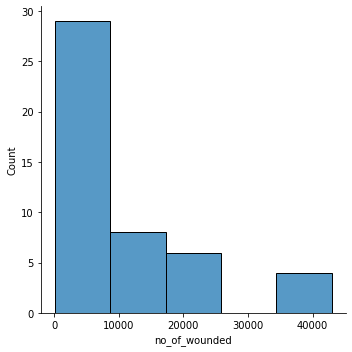

In [121]:
#distribution of no of wounded people from 1970 to 2017

sns.displot(data= year_wounded,x ='no_of_wounded',bins =5)

Text(0.5, 1.0, 'Title: No. of identified wounded people each year in span of 1970 to 2017')

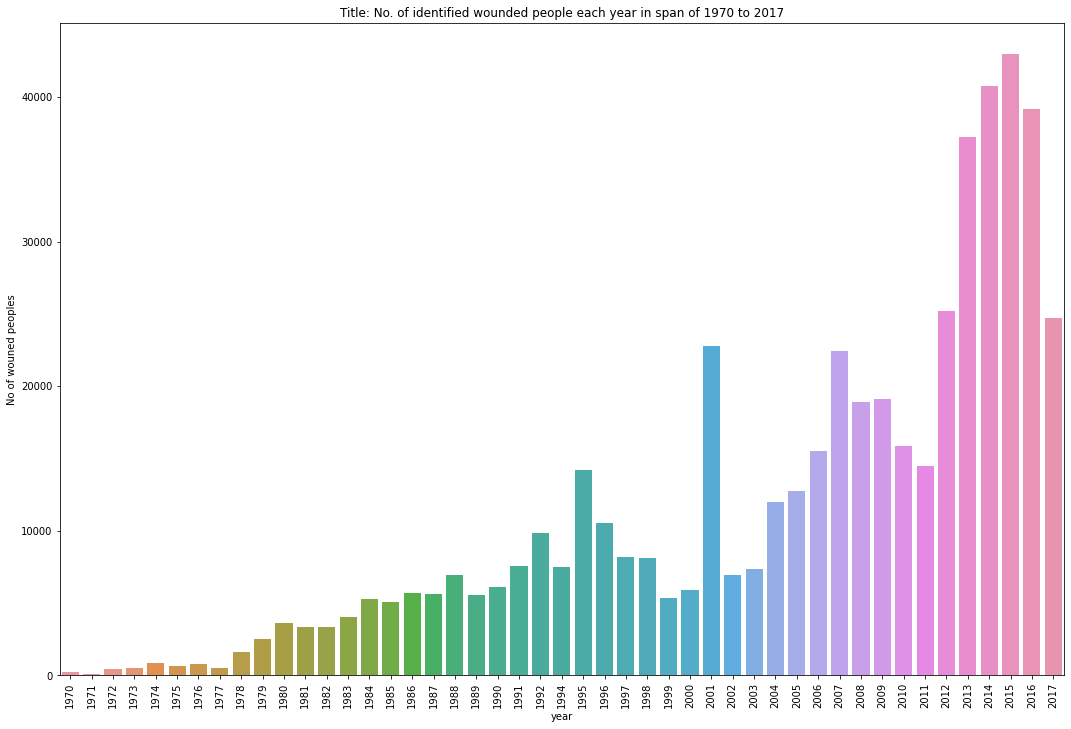

In [86]:
#visualising no of kills each year with barplot

plt.figure(figsize=(18,12))
sns.barplot(data = year_wounded,x ="year",y='no_of_wounded')
plt.xticks(rotation=90)
plt.ylabel("No of wouned peoples")
plt.title("Title: No. of identified wounded people each year in span of 1970 to 2017")

#No of identified affected people 

No of affected people is sum of no of kills and no of wounded people. Trend is similar to no of killed or no of wounded people.

In [87]:
year_affected = pd.DataFrame(df.groupby('year')['no_of_affected_people'].sum().reset_index().rename(columns = {'no_of_affected_people':'no_of_people_affected'}))
year_affected

,year,no_of_people_affected
0,1970,386.0
1,1971,255.0
2,1972,974.0
3,1973,865.0
4,1974,1404.0
5,1975,1233.0
6,1976,1429.0
7,1977,963.0
8,1978,3046.0
9,1979,4580.0


Text(0.5, 1.0, 'Title: No. of identified affected people each year in span of 1970 to 2017')

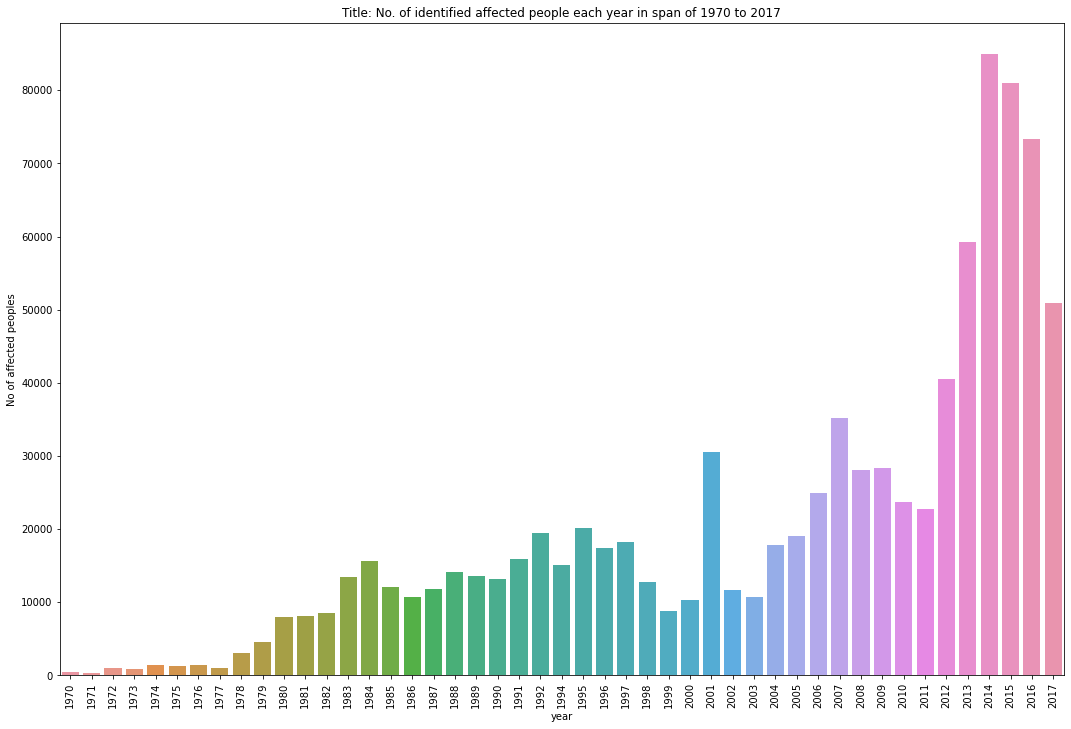

In [88]:
#visualising no of affected people each year with barplot

plt.figure(figsize=(18,12))
sns.barplot(data = year_affected,x ="year",y='no_of_people_affected')
plt.xticks(rotation=90)
plt.ylabel("No of affected peoples")
plt.title("Title: No. of identified affected people each year in span of 1970 to 2017")

#Multivariate analysis

# Most prominent type of attack in a country in span of 1970 to 2017

In [89]:
#list of countries with most prominet mode of attack used by terrorist till 2017 in that country

country_attack_type = pd.DataFrame(df.groupby('country_name').agg({'attack_type': [pd.Series.mode],'weapon_type':[pd.Series.mode]}).reset_index())
country_attack_type

,country_name,attack_type,weapon_type
,,mode,mode
0,Afghanistan,Bombing/Explosion,Explosives
1,Albania,Bombing/Explosion,Explosives
2,Algeria,Bombing/Explosion,Explosives
3,Andorra,Armed Assault,Firearms
4,Angola,Armed Assault,Firearms
...,...,...,...
200,Yemen,Bombing/Explosion,Explosives
201,Yugoslavia,Armed Assault,Firearms
202,Zaire,Armed Assault,Unknown


In [118]:
# List of most_affected countries and type of weapon used in that country

country_attack_type.loc[country_attack_type['country_name'].isin(most_affected_country)]

,country_name,attack_type,weapon_type
,,mode,mode
0,Afghanistan,Bombing/Explosion,Explosives
35,Colombia,Bombing/Explosion,Firearms
52,El Salvador,Armed Assault,Firearms
80,India,Bombing/Explosion,Explosives
84,Iraq,Bombing/Explosion,Explosives
134,Pakistan,Bombing/Explosion,Explosives
139,Peru,Bombing/Explosion,Firearms
140,Philippines,Bombing/Explosion,Firearms
159,Somalia,Bombing/Explosion,Explosives


In [127]:
# Type of attack mostly used in which country and region 

attack_type_mode_country = pd.DataFrame(df.groupby('attack_type').agg({'country_name': [pd.Series.mode],'region_name':[pd.Series.mode]}).reset_index())
attack_type_mode_country

,attack_type,country_name,region_name
,,mode,mode
0,Armed Assault,Pakistan,South Asia
1,Assassination,United Kingdom,Middle East & North Africa
2,Bombing/Explosion,Iraq,Middle East & North Africa
3,Facility/Infrastructure Attack,India,Western Europe
4,Hijacking,Sudan,Middle East & North Africa
5,Hostage Taking (Barricade Incident),"[Colombia, El Salvador]",South America
6,Hostage Taking (Kidnapping),India,South Asia
7,Unarmed Assault,India,South Asia
8,Unknown,Afghanistan,South Asia


#Type of target chosen mostly used for a country and region

In [128]:
# type of target chosen mostly used in specific country and region

target_type_mode_country = pd.DataFrame(df.groupby('target_type').agg({'country_name': [pd.Series.mode],'region_name':[pd.Series.mode]}).reset_index())
target_type_mode_country

,target_type,country_name,region_name
,,mode,mode
0,Abortion Related,United States,North America
1,Airports & Aircraft,Colombia,Western Europe
2,Business,Iraq,Middle East & North Africa
3,Educational Institution,Pakistan,South Asia
4,Food or Water Supply,Peru,South Asia
5,Government (Diplomatic),Lebanon,Middle East & North Africa
6,Government (General),Iraq,South Asia
7,Journalists & Media,Colombia,Middle East & North Africa
8,Maritime,Philippines,Southeast Asia


#Type of weapon mostly used in specific country

In [129]:
# type of weapon chosen mostly used for specific country and region

weapon_type_mode_country = pd.DataFrame(df.groupby('weapon_type').agg({'country_name': [pd.Series.mode],'region_name':[pd.Series.mode]}).reset_index())
weapon_type_mode_country

,weapon_type,country_name,region_name
,,mode,mode
0,Biological,United States,North America
1,Chemical,Afghanistan,South Asia
2,Explosives,Iraq,Middle East & North Africa
3,Fake Weapons,United States,"[Middle East & North Africa, Western Europe]"
4,Firearms,Pakistan,South Asia
5,Incendiary,United States,Western Europe
6,Melee,India,Middle East & North Africa
7,Other,United States,Middle East & North Africa
8,Radiological,Japan,East Asia


#Type of attack mostly used for city and country

In [130]:
df1 =df.copy()

In [131]:
df1 = df1[~(df1['city']=='Unknown')]

In [132]:
# type of attack chosen mostly used in specific city

attack_type_mode_country = pd.DataFrame(df1.groupby('attack_type').agg({'city': [pd.Series.mode],'region_name':[pd.Series.mode]}).reset_index())
attack_type_mode_country

,attack_type,city,region_name
,,mode,mode
0,Armed Assault,Karachi,South Asia
1,Assassination,Belfast,Middle East & North Africa
2,Bombing/Explosion,Baghdad,Middle East & North Africa
3,Facility/Infrastructure Attack,Athens,Western Europe
4,Hijacking,Beirut,Sub-Saharan Africa
5,Hostage Taking (Barricade Incident),San Salvador,South America
6,Hostage Taking (Kidnapping),Mosul,South Asia
7,Unarmed Assault,Jerusalem,South Asia
8,Unknown,Mosul,South Asia


#Relationship between wounded,killed and affected people across span of 1970 to 2017

In [133]:
dfs = [year_kills, year_wounded, year_affected]

import functools as ft
df_wka = ft.reduce(lambda left, right: pd.merge(left, right, on='year'), dfs)

In [134]:
df_wka

,year,no_of_kills,no_of_wounded,no_of_people_affected
0,1970,174.0,212.0,386.0
1,1971,173.0,82.0,255.0
2,1972,565.0,409.0,974.0
3,1973,370.0,495.0,865.0
4,1974,539.0,865.0,1404.0
5,1975,616.0,617.0,1233.0
6,1976,674.0,755.0,1429.0
7,1977,456.0,507.0,963.0
8,1978,1456.0,1590.0,3046.0
9,1979,2079.0,2501.0,4580.0


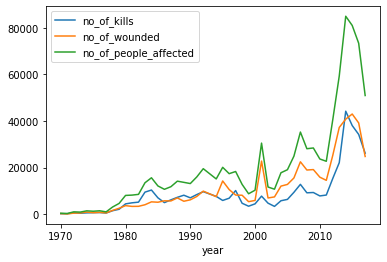

In [135]:
df_wka.set_index('year').plot()